In [1]:
import numpy as np
from scipy import ndimage
from scipy.misc import imresize
import matplotlib.pyplot as plt

In [2]:
all_fish = ndimage.imread('school.jpg', flatten=True)
fish_pattern = ndimage.imread('fish1.png', flatten=True)

In [3]:
f_all_fish = np.fft.fft2(all_fish)
f_fish_pattern = np.fft.fft2(np.rot90(fish_pattern, 2), f_all_fish.shape)

In [4]:
m = np.multiply(f_all_fish, f_fish_pattern)
corr = np.abs(np.fft.ifft2(m))
corr = corr.astype(float)
corr[corr < 0.68* np.amax(corr)] = 0

In [5]:
%matplotlib inline

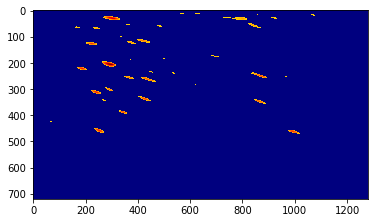

In [6]:
plt.imshow(corr, cmap='jet')
plt.show()

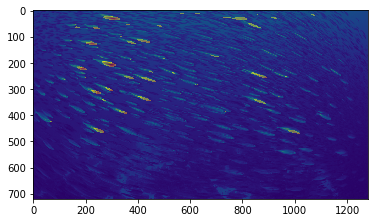

In [7]:
plt.imshow(all_fish)
plt.imshow(corr, cmap='jet', alpha=0.4)
plt.show()

In [8]:
def erase_pattern(x,y,img):
    if img[x,y] == 0:
        return 0
    img[x,y] = 0
    return 1 + erase_pattern(x, y - 1, img) + erase_pattern(x + 1, y, img) + erase_pattern(x, y + 1, img)

In [9]:
def count_patterns(img, pattern):
    count = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] != 0:
                erase_pattern(i,j, img)
                count += 1
    return count

In [10]:
count_patterns(corr, fish_pattern)

39

# Text

In [11]:
%matplotlib inline

In [12]:
img = ndimage.imread('./galia.png', flatten=True)
pat = ndimage.imread('./galia_e.png', flatten=True)
img = 255-img
pat = 255-pat

In [13]:
fi = np.fft.fft2(img)
fp = np.fft.fft2(np.rot90(pat, 2), fi.shape)  # nie pasuja wymiary to dopisze automagicznie zera

In [14]:
m = np.multiply(fi, fp)
corr = np.fft.ifft2(m)
corr = np.abs(corr)
corr = corr.astype(float)
corr[corr < 0.9 * np.amax(corr)] = 0

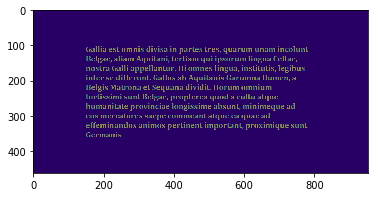

In [15]:
plt.imshow(img)
plt.imshow(corr, cmap='jet', alpha=0.4)
# plt.imshow(imresize(imresize(corr, 0.2), 5.0), cmap='jet', alpha=0.4)
plt.show()

In [16]:
len(list(filter(lambda x: x != 0, sum(corr.tolist(), []))))

43

In [17]:
galia_text = "Gallia est omnis divisa in partes tres, quarum unam incolunt Belgae, aliam Aquitani, tertiam qui ipsorum lingua Celtae, nostra Galli appellantur. Hi omnes lingua, institutis, legibus inter se differunt. Gallos ab Aquitanis Garumna flumen, a Belgis Matrona et Sequana dividit. Horum omnium fortissimi sunt Belgae, propterea quod a cultu atque humanitate provinciae longissime absunt, minimeque ad eos mercatores saepe commeant atque ea quae ad effeminandos animos pertinent important, proximique sunt Germanis"
len(list(filter(lambda x: x == 'e', galia_text)))

43